# Simple Image Processing with Python

In the following example we are going to use the Image classes we developed in the previous python lectures and use some randomly generated images to process and catagorise them by the most dominant colour. 

## Part 1 Loading the images

To start with we will visualise the random images we created we can do that in markdown using the following code ```![](name of file)```  so in this case we will use ```![](test.0000.png)``` 

![](test.0000.png)

Next we are going to load in the image so we can process it. We wrote the Image class in the previous labs and we are going to import this in our python code. First thing we need to do is add to the python path so the notebook can find it.

In [1]:
# import os,sys
# sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
import Image

Now we have imported image we can use it to attempt to load the image using the image class we wrote last week.

In [2]:
image = Image.Image(0,0)
image.load("test.0000.png")
print(f"{image.width=},{image.height=}")

image.width=500,image.height=500


One of the methods we implemented in the Image class is to get the average pixel colour values in both HSV and RGB 

In [3]:
r,g,b,_ = image.get_average_rgba()
h,s,v = image.get_average_hsv()
print(f"Average RGB is {r} {g} {b}")
print(f"Average HSV is {h},{s},{v}")

Average RGB is 158 154 8
Average HSV is 58,95,62


Let's make this more visual to do this we need to write raw HTML to the output stream. We can do this using the iPython HTML and Display modules.

In [4]:
from IPython.display import HTML, display

display(HTML('''
<svg height="100" width="100">
<rect x="25" y="25" width="50" height="50"  fill="blue" />
</svg>
'''))

Alternativly we can use the Matplotlib library to do the same, however this does take more setup. 

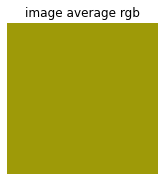

In [5]:
import matplotlib.pyplot as plt

def square(width,height,r,g,b,title="") :
    # annoyingly dimensions are in inches
    px = 1/plt.rcParams['figure.dpi']  # pixel in inches  
    plt.figure(figsize = (width*px,height*px))
    img = plt.imshow([[(r,g,b)]])
    plt.title(title)
    plt.axis('off')
    
square(200,200,r,g,b,"image average rgb")

Lets use this function to display our colour for the average RGB next to the original image. As we have already imported our own module called Image so we are going to import the IPython Image module as IPImage.


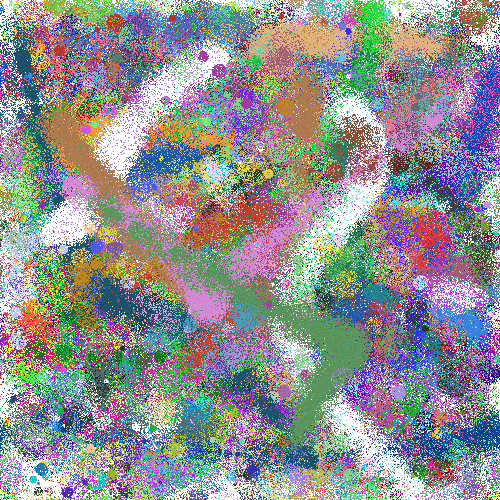

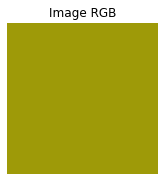

In [6]:
from IPython.display import Image as IPImage

square(200,200,r,g,b,"Image RGB")
IPImage("test.0000.png", width=200, height=200)

Lets process all the images in the current folder. This time we are going to use the subplots feature of matplotlib.

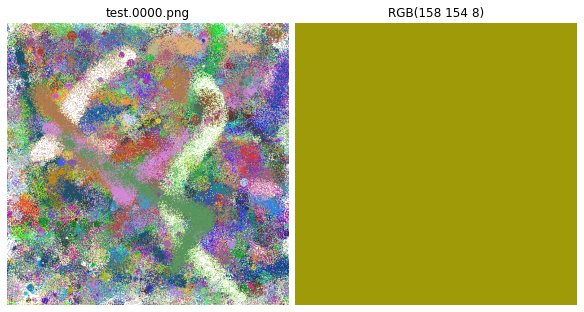

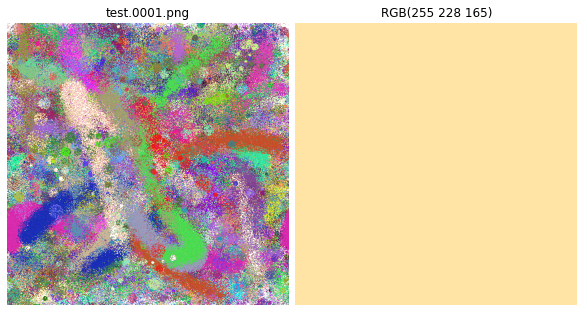

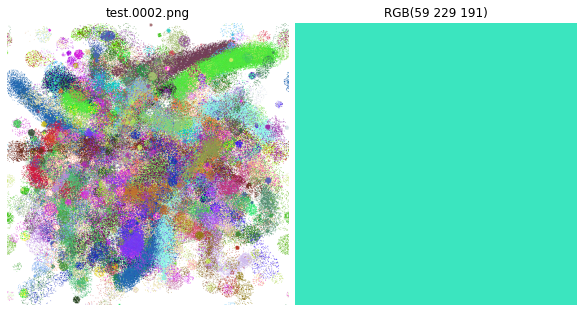

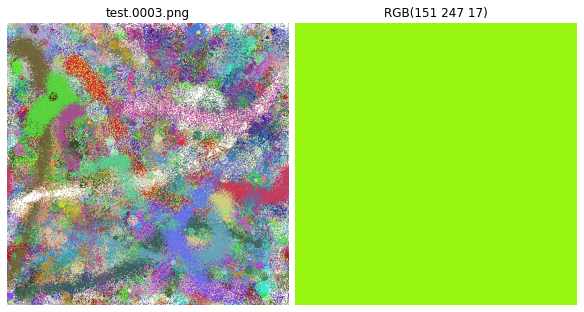

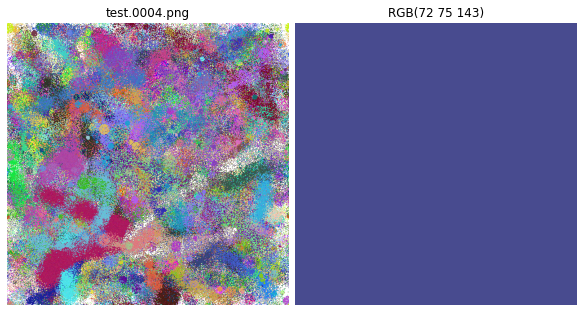

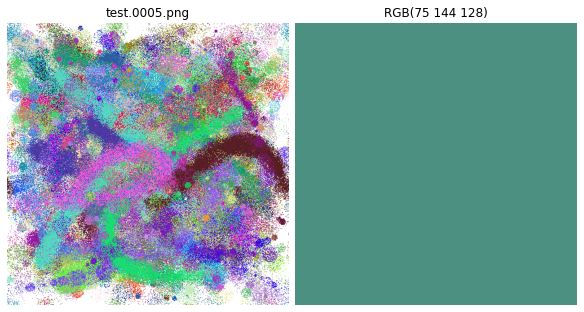

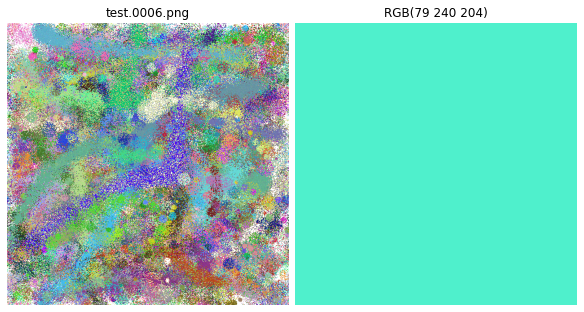

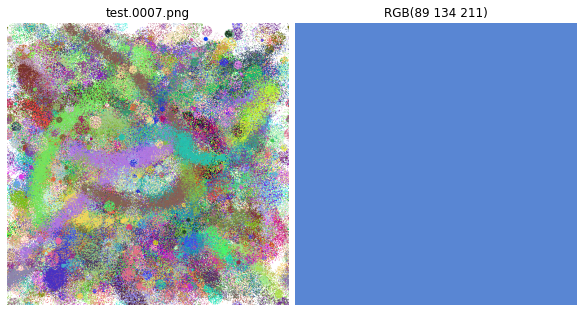

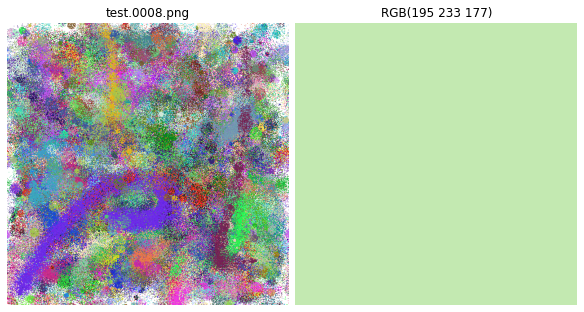

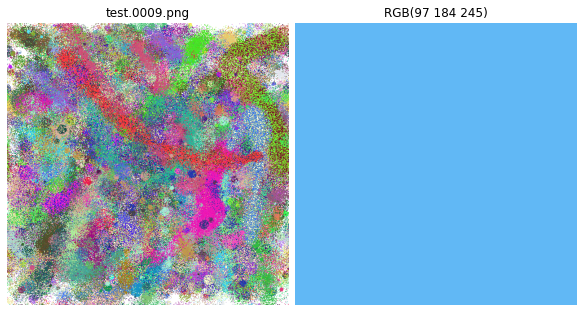

In [7]:
import os
image = Image.Image(0,0)
for file in sorted(os.listdir(".")) :
    if file.endswith(".png") :
        image.load(file)
        r,g,b,_ = image.get_average_rgba()
        f, ax = plt.subplots(1, 2,figsize=(8,8),constrained_layout = True)
        [axi.set_axis_off() for axi in ax.ravel()]
        image_from_file = plt.imread(file)
        ax[0].imshow(image_from_file)
        ax[0].set_title(file)
        ax[1].imshow([[(r,g,b)]])
        ax[1].set_title(f"RGB({r} {g} {b})")


As we can see the average colour approach is not the best, we need to find another way. 

## Dominant colour search

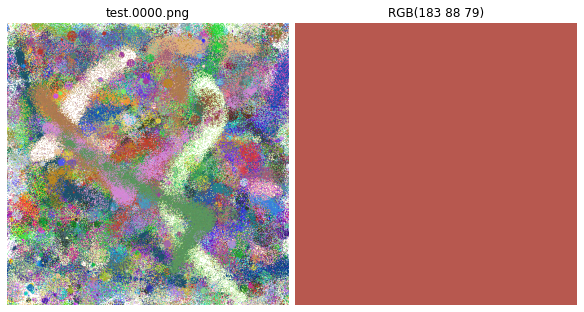

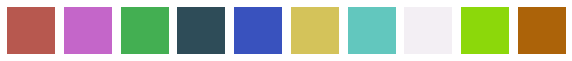

In [8]:
import scipy.cluster
import sklearn.cluster
import numpy as np
import PIL.Image
image = PIL.Image.open("test.0000.png")
data_array = np.asarray(image)
shape = data_array.shape
data_array = data_array.reshape(np.product(shape[:2]), shape[2]).astype(float)
kmeans = sklearn.cluster.MiniBatchKMeans(
        n_clusters=10,
        init="k-means++",
        max_iter=20,
        random_state=1000
    ).fit(data_array)
codes = kmeans.cluster_centers_
vecs, _dist = scipy.cluster.vq.vq(data_array, codes)         # assign codes
counts, _bins = np.histogram(vecs, len(codes))    # count occurrences

colours = []
for index in np.argsort(counts)[::-1]:
    colours.append(tuple([int(code) for code in codes[index]]))



f, ax = plt.subplots(1, 2,figsize=(8,8),constrained_layout = True)
[axi.set_axis_off() for axi in ax.ravel()]
image_from_file = plt.imread("test.0000.png")
ax[0].imshow(image_from_file)
ax[0].set_title("test.0000.png")
ax[1].imshow([[(colours[0][0],colours[0][1],colours[0][2])]])
ax[1].set_title(f"RGB({colours[0][0]} {colours[0][1]} {colours[0][2]})")

f, ax = plt.subplots(1, len(colours),figsize=(10,10))
index=0
for c in colours :
    ax[index].set_axis_off()
    ax[index].imshow([[(c[0],c[1],c[2])]])
    #ax[index].set_title(f"RGB({c[0]} {c[1]} {c[2]})")
    index+=1

Here is another way of doing it


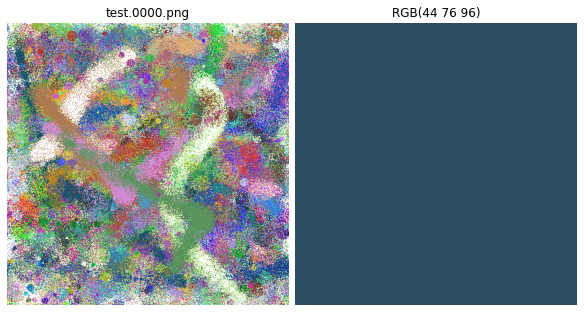

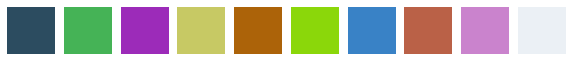

In [12]:

num_clusters=10
codes, dist = scipy.cluster.vq.kmeans(data_array, num_clusters)
vecs, dist = scipy.cluster.vq.vq(data_array, codes)         # assign codes
counts, bins = np.histogram(vecs, len(codes))    # count occurrences
index_max = np.argmax(counts)                    # find most frequent
peak = codes[index_max]


f, ax = plt.subplots(1, 2,figsize=(8,8),constrained_layout = True)
[axi.set_axis_off() for axi in ax.ravel()]
image_from_file = plt.imread("test.0000.png")
ax[0].imshow(image_from_file)
ax[0].set_title("test.0000.png")
ax[1].imshow([[(int(peak[0]),int(peak[1]),int(peak[2]))]])
ax[1].set_title(f"RGB({int(peak[0])} {int(peak[1])} {int(peak[2])})")

f, ax = plt.subplots(1, len(codes),figsize=(10,10))
index=0
for c in codes :
    ax[index].set_axis_off()
    ax[index].imshow([[(int(c[0]),int(c[1]),int(c[2]))]])
    index+=1

Lets see all of them